<a href="https://colab.research.google.com/github/lifeisbeautifu1/TensorFlow/blob/master/01_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [303]:
import tensorflow as tf
print(tf.__version__)

2.9.2


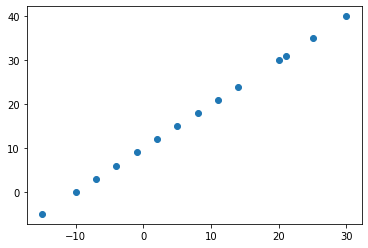

In [304]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-15.0, -10.0, -7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 20.0, 21.0, 25.0, 30.0])

Y = np.array([-5.0, 0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 30.0, 31.0, 35.0, 40.0])

plt.scatter(X, Y)

In [305]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [306]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [307]:
X[0], Y[0]

(-15.0, -5.0)

In [308]:
X[1], Y[1]

(-10.0, 0.0)

In [309]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((14,), (14,))

In [310]:
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(14,), dtype=float64, numpy=
 array([-15., -10.,  -7.,  -4.,  -1.,   2.,   5.,   8.,  11.,  14.,  20.,
         21.,  25.,  30.])>, <tf.Tensor: shape=(14,), dtype=float64, numpy=
 array([-5.,  0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 30., 31., 35.,
        40.])>)

In [311]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=['mae'])

# 3. Fit the model
model.fit(X, Y, epochs=5)



Epoch 1/5
1/1 [==============================] - 0s 263ms/step - loss: 13.0403 - mae: 13.0403
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 12.5302 - mae: 12.5302
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 12.0202 - mae: 12.0202
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.5101 - mae: 11.5101
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 11.0001 - mae: 11.0001


In [312]:
X, Y

(<tf.Tensor: shape=(14,), dtype=float64, numpy=
 array([-15., -10.,  -7.,  -4.,  -1.,   2.,   5.,   8.,  11.,  14.,  20.,
         21.,  25.,  30.])>, <tf.Tensor: shape=(14,), dtype=float64, numpy=
 array([-5.,  0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 30., 31., 35.,
        40.])>)

In [313]:
model.predict([17.0])

1/1 [==============================] - 0s 57ms/step


array([[15.751734]], dtype=float32)

In [314]:
# Let's rebuild our model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1, ))
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 272ms/step - loss: 12.4688 - mae: 12.4688
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.9588 - mae: 11.9588
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.4487 - mae: 11.4487
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9387 - mae: 10.9387
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4286 - mae: 10.4286
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.9186 - mae: 9.9186
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4085 - mae: 9.4085
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.8985 - mae: 8.8985
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 8.3884 - mae: 8.3884
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.8784 - mae: 7.8784
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - 

In [315]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(14,), dtype=float64, numpy=
 array([-15., -10.,  -7.,  -4.,  -1.,   2.,   5.,   8.,  11.,  14.,  20.,
         21.,  25.,  30.])>, <tf.Tensor: shape=(14,), dtype=float64, numpy=
 array([-5.,  0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 30., 31., 35.,
        40.])>)

In [316]:
model.predict([17.0])

1/1 [==============================] - 0s 53ms/step


array([[23.979145]], dtype=float32)

In [317]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1, )),
    tf.keras.layers.Dense(100, input_shape=(1, )),
    tf.keras.layers.Dense(100, input_shape=(1, )),
    tf.keras.layers.Dense(1, input_shape=(1, ))
])


model.compile(loss=tf.keras.losses.mae, 
          optimizer=tf.keras.optimizers.Adam(lr=0.001),
          metrics=["mae"])

model.fit(X, Y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 446ms/step - loss: 15.2569 - mae: 15.2569
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9865 - mae: 12.9865
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8392 - mae: 10.8392
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 8.6303 - mae: 8.6303
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 7.5343 - mae: 7.5343
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.5870 - mae: 8.5870
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9197 - mae: 8.9197
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.5908 - mae: 8.5908
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.9784 - mae: 7.9784
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.2797 - mae: 7.2797
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3280 - m

In [318]:
model.predict([17.0])

1/1 [==============================] - 0s 59ms/step


array([[22.587086]], dtype=float32)

In [319]:
model.predict([5.0, -5.0])

1/1 [==============================] - 0s 25ms/step


array([[14.206737 ],
       [ 7.2231193]], dtype=float32)

In [320]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1, ), activation="relu"),
    tf.keras.layers.Dense(100, input_shape=(1, ), activation="relu"),
    tf.keras.layers.Dense(100, input_shape=(1, ), activation="relu"),
    tf.keras.layers.Dense(1, input_shape=(1, ))
])


model.compile(loss=tf.keras.losses.mae, 
          optimizer=tf.keras.optimizers.Adam(lr=0.01),
          metrics=["mae"])

model.fit(X, Y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 447ms/step - loss: 17.4252 - mae: 17.4252
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 13.3286 - mae: 13.3286
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 7.8193 - mae: 7.8193
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 6.0235 - mae: 6.0235
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 8.0908 - mae: 8.0908
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 6.6100 - mae: 6.6100
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 4.4295 - mae: 4.4295
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 6.0737 - mae: 6.0737
Epoch 9/50
1/1 [==============================] - 0s 7ms/step - loss: 6.9526 - mae: 6.9526
Epoch 10/50
1/1 [==============================] - 0s 7ms/step - loss: 6.3538 - mae: 6.3538
Epoch 11/50
1/1 [==============================] - 0s 7ms/step - loss: 4.6823 - 

In [321]:
model.predict([17.0, 5.0, -5.0])

1/1 [==============================] - 0s 68ms/step


array([[28.002838 ],
       [15.6875925],
       [ 4.6963353]], dtype=float32)

## Evaluating a model

In [322]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [323]:
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

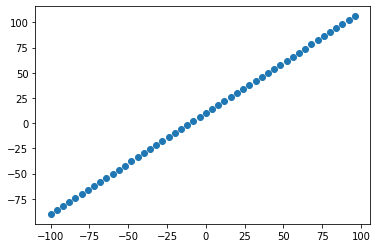

In [324]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)

In [325]:
len(X)

50

In [326]:
X_train = X[:40]
Y_train = Y[:40]

X_test = X[40:]
Y_test= Y[40:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

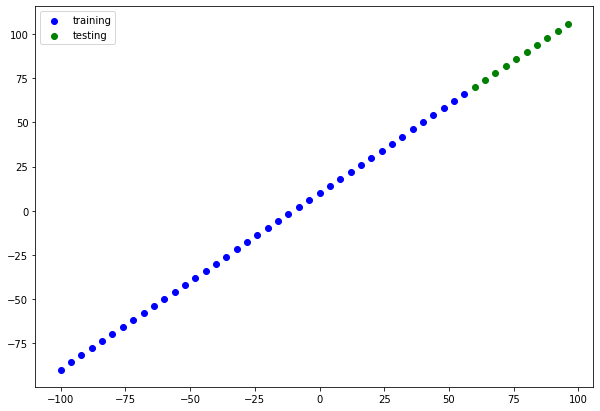

In [327]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="training")
#Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="testing")

plt.legend();


In [328]:
# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1, ), name="input_layer"),
    tf.keras.layers.Dense(1, input_shape=(1, ), name="output_layer")
])

# 2. Compile a model

model.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 metrics="mae")

# 3. Fit the model
# model.fit(X_train, Y_train, epochs=100)

In [329]:
model.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [330]:
model.fit(X_train, Y_train, epochs=100, verbose=0)

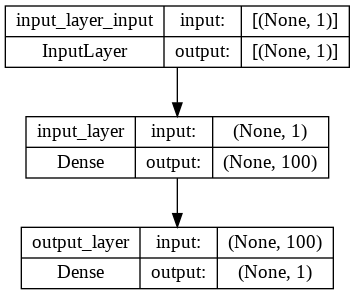

In [331]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [332]:
Y_pred = model.predict(X_test)
Y_pred

1/1 [==============================] - 0s 44ms/step


array([[ 74.87466 ],
       [ 79.20304 ],
       [ 83.5314  ],
       [ 87.85978 ],
       [ 92.188156],
       [ 96.5165  ],
       [100.84488 ],
       [105.17325 ],
       [109.5016  ],
       [113.829994]], dtype=float32)

In [333]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [334]:
# Let's create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_pred):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", label="Training data")

  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend();

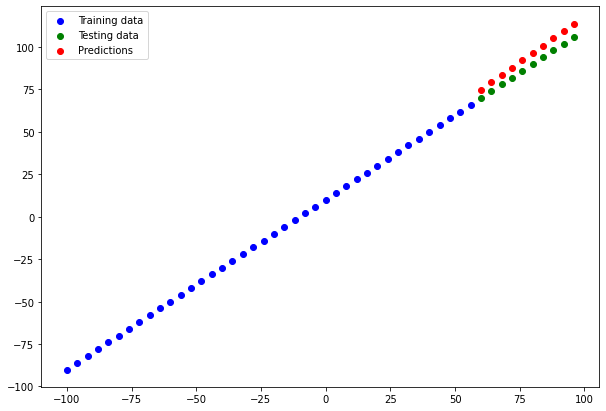

In [335]:
plot_predictions(train_data=X_train,
                train_labels=Y_train,
                test_data=X_test,
                test_labels=Y_test,
                predictions=Y_pred)

In [336]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 105ms/step - loss: 6.3523 - mae: 6.3523


[6.3523268699646, 6.3523268699646]

In [337]:
Y_pred

array([[ 74.87466 ],
       [ 79.20304 ],
       [ 83.5314  ],
       [ 87.85978 ],
       [ 92.188156],
       [ 96.5165  ],
       [100.84488 ],
       [105.17325 ],
       [109.5016  ],
       [113.829994]], dtype=float32)

In [338]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [339]:
tf.metrics.mean_absolute_error(y_true=Y_test, y_pred=Y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.275206, 11.918783, 10.493719, 10.      , 10.437632, 11.806601,
       14.106928, 17.338598, 21.501602, 25.829992], dtype=float32)>

In [340]:
Y_pred

array([[ 74.87466 ],
       [ 79.20304 ],
       [ 83.5314  ],
       [ 87.85978 ],
       [ 92.188156],
       [ 96.5165  ],
       [100.84488 ],
       [105.17325 ],
       [109.5016  ],
       [113.829994]], dtype=float32)

In [341]:
tf.squeeze(Y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 74.87466 ,  79.20304 ,  83.5314  ,  87.85978 ,  92.188156,
        96.5165  , 100.84488 , 105.17325 , 109.5016  , 113.829994],
      dtype=float32)>

In [342]:
mae = tf.metrics.mean_absolute_error(y_true=Y_test, y_pred=tf.squeeze(Y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.3523264>

In [343]:
mse = tf.metrics.mean_squared_error(Y_test, tf.squeeze(Y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=41.241615>

In [344]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

In [345]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1, ))
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 38ms/step


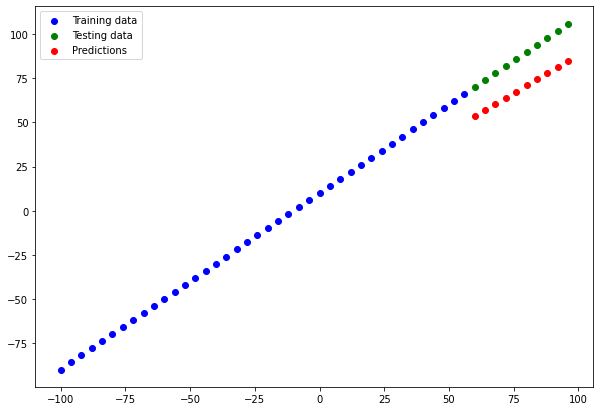

In [346]:
Y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=Y_pred_1)

In [347]:
# Calculate model_1 evalutaion metrics

mae_1 = mae(Y_test, Y_pred_1)
mse_1= mse(Y_test, Y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [348]:
# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1, )),
    tf.keras.layers.Dense(1, input_shape=(1, ))
])

# 2. Compile the model

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"])


# 3. Train the model

model_2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 52.8279 - mae: 52.8279
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 31.8812 - mae: 31.8812
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 13.1042 - mae: 13.1042
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 13.2455 - mae: 13.2455
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 19.4450 - mae: 19.4450
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 18.5626 - mae: 18.5626
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 13.6486 - mae: 13.6486
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 8.7722 - mae: 8.7722
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8524 - mae: 9.8524
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 13.2748 - mae: 13.2748
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

1/1 [==============================] - 0s 43ms/step


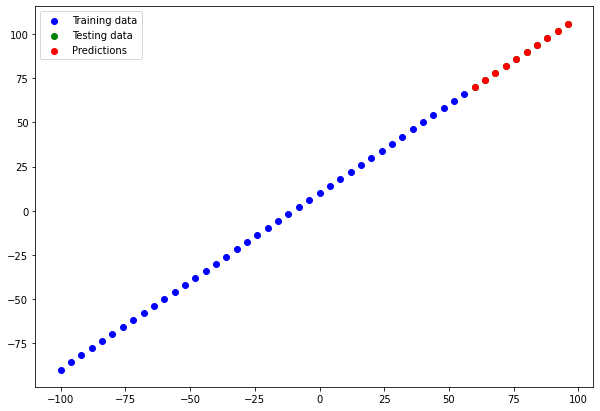

In [349]:
Y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=Y_pred_2)

In [350]:
mae_2 = mae(Y_test, Y_pred_2)
mse_2 = mse(Y_test, Y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=0.316214>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.10396774>)

In [351]:
# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1, )),
    tf.keras.layers.Dense(1, input_shape=(1, ))
])

# 2. Compile the model

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mae"])


# 3. Train the model

model_3.fit(X_train, Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 41.3304 - mae: 41.3304
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 21.8751 - mae: 21.8751
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 8.4250 - mae: 8.4250
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 15.7512 - mae: 15.7512
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 18.1056 - mae: 18.1056
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 14.7999 - mae: 14.7999
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 10.5476 - mae: 10.5476
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 8.3644 - mae: 8.3644
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 10.4610 - mae: 10.4610
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 9.1684 - mae: 9.1684
Epoch 11/500
2/2 [==============================] - 0s 7ms/step 

1/1 [==============================] - 0s 55ms/step


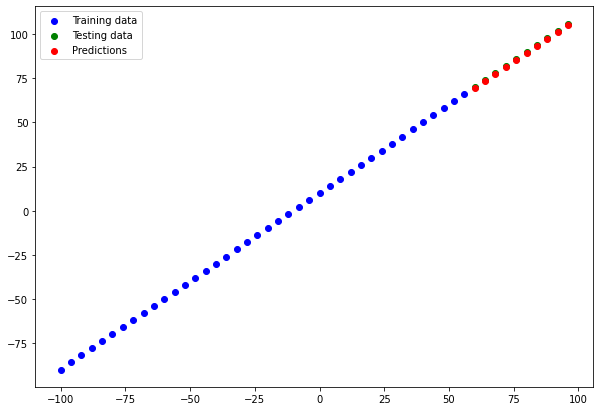

In [352]:
Y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=Y_pred_3)

In [353]:
mae_3 = mae(Y_test, Y_pred_3)
mse_3 = mse(Y_test, Y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.72238314>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.53418064>)

In [354]:
import pandas as pd

model_results =[['model_1', mae_1.numpy(), mse_1.numpy()],
               ['model_2', mae_2.numpy(), mse_2.numpy()],
               ['model_3', mae_3.numpy(), mse_3.numpy()],
               ]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,0.316214,0.103968
2,model_3,0.722383,0.534181


In [355]:
model_3.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 100)               200       
                                                                 
 dense_173 (Dense)           (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Saving models

In [356]:
# Save model using the SavedModel format
model_3.save('best_model_SavedModel_format')

In [357]:
# Save model using the HDF5 format
model_3.save('best_model_HDF5_format.h5')

## Load the modal


In [358]:
loaded_SavedModel_format = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 100)               200       
                                                                 
 dense_173 (Dense)           (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [359]:
# Compare model_3 predictions with saved model prodections
model_3_preds = model_3.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_3_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 38ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [360]:
loaded_h5_format = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_format.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 100)               200       
                                                                 
 dense_173 (Dense)           (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [361]:
# Compare model_3 predictions with saved model format h5 prodections
model_3_preds = model_3.predict(X_test)
loaded_h5_format_preds = loaded_h5_format.predict(X_test)
model_3_preds == loaded_h5_format_preds

1/1 [==============================] - 0s 45ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download files


In [362]:
from google.colab import files
files.download('best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [363]:
# Save a file from Google Collab to Google Dirve 
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

In [364]:
!ls /content/drive/MyDrive

 best_model_HDF5_format.h5   livetest5.png   output16.png   output4.png
'Colab Notebooks'	     livetest6.png   output17.png   output5.avi
 Fire			     livetest.png    output2.avi    output6.avi
 livetest1.png		     Non-Fire	     output2.png    output9.png
 livetest2.png		     output11.png    output3.avi    output.avi
 livetest3.png		     output13.png    output3.png    output.png
 livetest4.png		     output15.png    output4.avi


## A larger example

In [365]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [366]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## One hot encoding


In [367]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [368]:
X = insurance_one_hot.drop('charges', axis=1)
Y = insurance_one_hot['charges']

In [369]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [377]:
## Build the neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [378]:
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [379]:
## Build the neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.01),
                        metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, Y_train, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [388]:
insurance_model_2.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3523.0198 - mae: 3523.0198


[3523.019775390625, 3523.019775390625]

## Trying improving our model

In [389]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_3.fit(X_train, Y_train, epochs=100, verbose=0)


In [390]:
insurance_model_3.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [394]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_4.fit(X_train, Y_train, epochs=200, verbose=0)

In [395]:
insurance_model_4.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7856


[3488.785400390625, 3488.78564453125]

Text(0.5, 0, 'epochs')

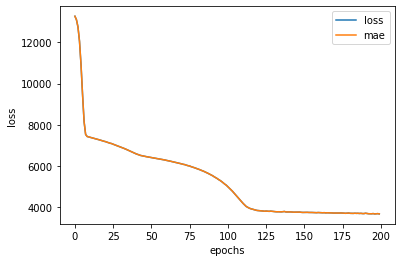

In [396]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

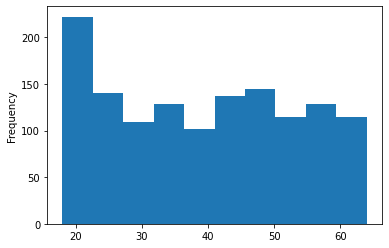

In [397]:
X['age'].plot(kind='hist')

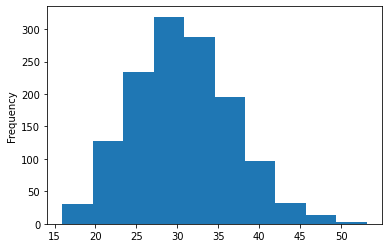

In [398]:
X['bmi'].plot(kind='hist')

In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [403]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown="ignore"), ['sex', 'smoker', 'region']))


# Create X & Y

X = insurance.drop('charges', axis=1)
Y = insurance['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [406]:
# What does our data look like now?

X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [407]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [408]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful

In [409]:
# Set random seed
tf.random.set_seed(42)


# 1. Create the model
normal_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model

normal_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['mae'])


# 3. Fit the model

normal_model.fit(X_train_normal, Y_train, epochs=200, verbose=0)

In [410]:
normal_model.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.5776 - mae: 3171.5776


[3171.57763671875, 3171.57763671875]